In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import requests
import json
import time
import datetime
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [3]:
noaa_url = "https://www.aviationweather.gov/cgi-bin/json/IsigmetJSON.php"  # data source: National Oceanic and Atmospheric Administration

In [4]:
page = ""
while page == "":
    try:
        page = requests.get(noaa_url)
        data = page.json()
        break
    except:
        time.sleep(5)
        continue

In [5]:
new_features = data["features"][1:]
new_data = {"type": "FeatureCollection", "features": new_features}
gdf = gpd.GeoDataFrame.from_features(new_data, crs="EPSG:4326")
gdf.head()

,geometry,data,icaoId,firId,firName,seriesId,hazard,validTimeFrom,validTimeTo,qualifier,geom,coords,top,rawSigmet,base,dir,spd,chng
0,"POLYGON ((26.20000 -27.20000, 30.35000 -27.730...",ISIGMET,FAOR,FAJA,FAJA JOHANNESBURG,A01,TS,2022-11-03T06:02:00Z,2022-11-03T10:00:00Z,EMBD,AREA,"-27.200,26.200,-27.733,30.350,-28.033,31.517,-...",42000.0,WSZA21 FAOR 030607\nFAJA SIGMET A01 VALID 0306...,NaN,NaN,NaN,NaN
1,"POLYGON ((57.00000 -30.00000, 57.00000 -34.780...",ISIGMET,FAOR,FAJO,FAJO JOHANNESBURG OCEANIC,A01,TS,2022-11-03T06:00:00Z,2022-11-03T10:00:00Z,EMBD,AREA,"-30.000,57.000,-34.783,57.000,-36.167,56.683,-...",30000.0,WSZA21 FAOR 030604\nFAJO SIGMET A01 VALID 0306...,NaN,NaN,NaN,NaN
2,"POLYGON ((33.83000 -29.88000, 34.95000 -30.770...",ISIGMET,FAOR,FAJO,FAJO JOHANNESBURG OCEANIC,B01,TS,2022-11-03T06:02:00Z,2022-11-03T10:00:00Z,EMBD,AREA,"-29.883,33.833,-30.767,34.950,-33.050,33.733,-...",42000.0,WSZA21 FAOR 030608\nFAJO SIGMET B01 VALID 0306...,NaN,NaN,NaN,NaN
3,"POLYGON ((17.78000 -30.50000, 21.27000 -30.500...",ISIGMET,FAOR,FACA,FACA CAPE TOWN,A01,TS,2022-11-03T06:02:00Z,2022-11-03T10:00:00Z,EMBD,AREA,"-30.500,17.783,-30.500,21.267,-31.317,23.750,-...",42000.0,WSZA21 FAOR 030606\nFACA SIGMET A01 VALID 0306...,NaN,NaN,NaN,NaN
4,"POLYGON ((32.97000 -26.87000, 35.00000 -27.830...",ISIGMET,FAOR,FAJA,FAJA JOHANNESBURG,B01,TURB,2022-11-03T06:25:00Z,2022-11-03T10:00:00Z,SEV,AREA,"-26.867,32.967,-27.833,35.000,-29.633,33.933,-...",3000.0,WSZA21 FAOR 030630\nFAJA SIGMET B01 VALID 0306...,0.0,NaN,NaN,NaN


In [6]:
hazard_names = {
    "ICE": "Icing",
    "MTW": "Mountain Waves",
    "TC": "Tropical Cyclone",
    "TS": "Thunderstorm",
    "TURB": "Turbulence",
    "VA": "Volcanic Ash",
    "WV": "Volcanic Ash",
    "DS": "Dust Storm",
    "SS": "Sand Storm",
    "RDOACT CLD": "Radioactive Cloud",
}
gdf["names"] = gdf["hazard"].apply(lambda x: hazard_names[x])

11/03/2022, 07:38:57


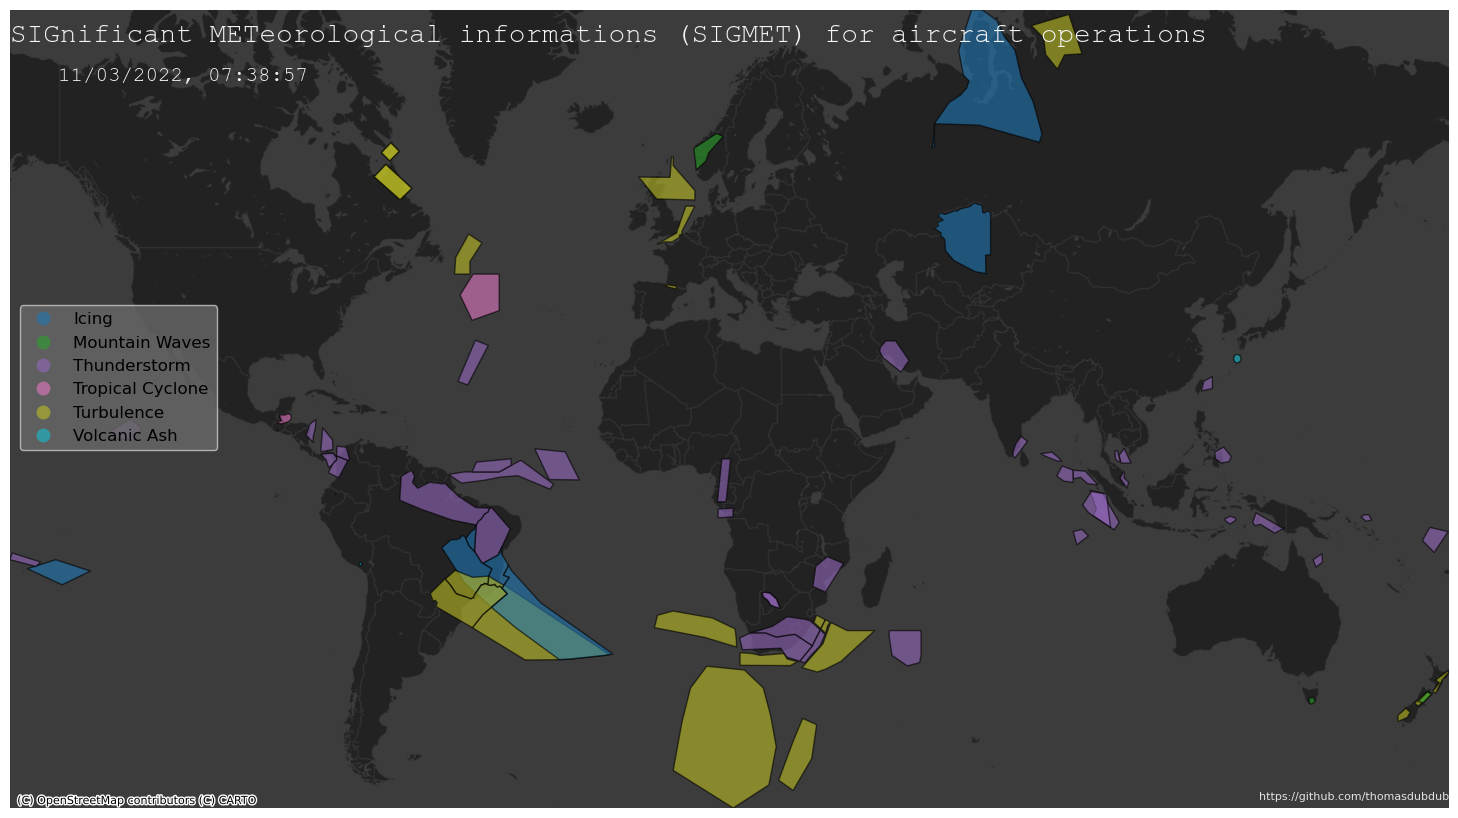

In [7]:
f, ax = plt.subplots(figsize=(15, 15))

proj_str = "epsg:3857"  # "ESRI:53042"
gdf_3857 = gdf.to_crs(proj_str)
# gdf_3857 = gdf.to_crs(epsg=3857)  # Web mercator
gdf_3857.plot(
    ax=ax,
    column="names",
    legend=True,
    legend_kwds={
        "bbox_to_anchor": (0.15, 0.64),
        "fontsize": 12,
        "frameon": True,
        "facecolor": "dimgrey",
    },
    alpha=0.60,
    edgecolor="black",
)
ax.axis("off")
ax.margins(0)
cx.add_basemap(
    ax,
    alpha=0.9,
    crs=gdf_3857.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
)

plt.title(
    "SIGnificant METeorological informations (SIGMET) for aircraft operations",
    fontsize=20,
    fontname="Courier New",
    y=0.95,
    color="whitesmoke",
    loc="left",
    # x=0.51,
)
mydate = datetime.datetime.now()
print(mydate.strftime("%m/%d/%Y, %H:%M:%S"))
plt.title(
    mydate.strftime("%m/%d/%Y, %H:%M:%S"),
    fontsize=15,
    fontname="Courier New",
    y=0.90,
    # loc="left",
    # x=0.7,
    color="whitesmoke",
    x=0.12,
)
plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="whitesmoke",
    alpha=0.9,
    # x=0.90,
    y=0.00,
    loc="right",
)
plt.tight_layout()
plt.savefig("sigmet.png", dpi=150, bbox_inches="tight")